In [3]:
import pandas as pd

In [4]:
#read CSV file directly from the URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [5]:
# display first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
# display last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
data.shape

(200, 4)

In [8]:
import seaborn as sns

In [9]:
%matplotlib inline

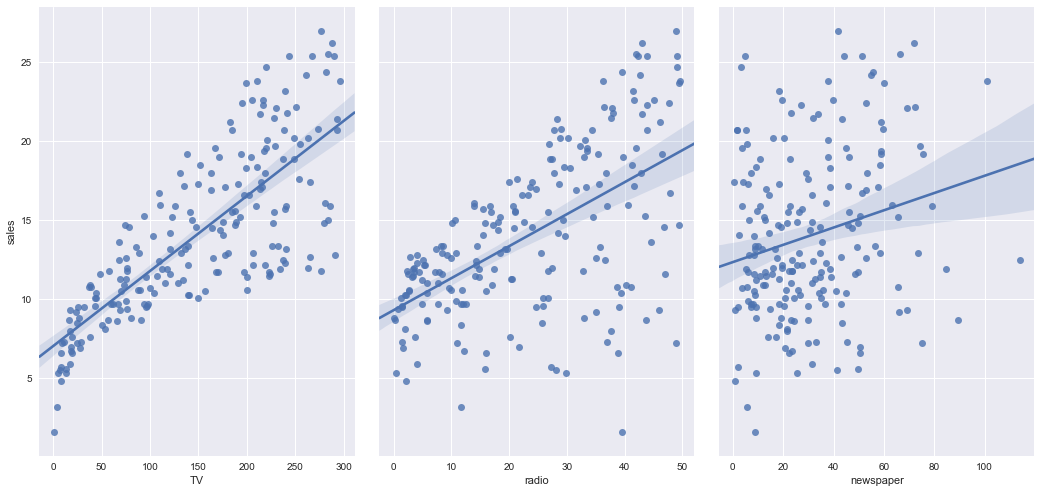

In [10]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [11]:
# y = b0 + b1*TV + b2*Radio + b3*Newspaper
# b = model coefficients, these values are learnt during the model fitting step using the least squares criterion
# Fitted model can be used for making predictions

In [12]:
# create a python list pf feature names
feature_cols = ['TV', 'radio', 'newspaper']

In [13]:
# use the list to select a subset of the original Dataframe
X = data[feature_cols]

In [14]:
# equivalent command
X = data[['TV', 'radio', 'newspaper']]

In [22]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [23]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [24]:
y = data['sales']

In [25]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [26]:
from sklearn.cross_validation import train_test_split

In [27]:
# default split is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
print X_train.shape
print X_test.shape

(150, 3)
(50, 3)


In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
# instantiate model
linreg = LinearRegression()

In [34]:
# fit the model to the training data and learn the coefficients
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# print the intercept and coefficients
print linreg.intercept_
print linreg.coef_


2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [38]:
# y = 2.88 + 0.0466*TV + 0.179*radio + 0.00345*newspaper
# for a given amount of radio and newspaper ad spending a 'unit'increase in TV ad spending
# is associated with a 0.0466 'unit' increase in sales
# this is association and not causation

In [39]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

In [40]:
y_pred = linreg.predict(X_test)

In [42]:
from sklearn import metrics
#MAE
print metrics.mean_absolute_error(y_pred, y_test)

1.06689170826


In [43]:
#MSE
print metrics.mean_squared_error(y_pred, y_test)

1.97304562023


In [45]:
#RMSE
import numpy as np
print np.sqrt(metrics.mean_squared_error(y_pred, y_test))

1.40465142303


In [49]:
# Feature Selection
# Does 'newspaper' belong in our model? Does it improve the quality of our predictions?
# Let's remove it from the model and check the RMSE

# list of feature names
feature_cols = ['TV', 'radio']

# use the feature list to select a subset of original dataframe
X = data[feature_cols]

# select a Series from the dataframe
y = data['sales']

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# calculate the RMSE of our predictions
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994


In [ ]:
# As we want to minimize the model, since RMSE is lower when newspaper is removed it should not be included 
# as a feature in the model